> #### **Project Title**
- Wine Quality Prediction Using Machine Learning

> #### **Objective**
- To develop a machine learning model that accurately predicts the quality of wine based on its physicochemical properties such as acidity, sugar level, alcohol content, pH, sulphates, and other features provided in the WinequalityN dataset.

> #### **Business Goal**
The goal is to assist wine producers, quality control labs, and retailers in automating and improving the wine evaluation process. By predicting wine quality using data, businesses can:
- Save time and cost by reducing dependency on manual tasting panels.
- Improve quality control during production.
- Optimize production parameters to consistently produce high-quality wine.
- Gain competitive advantage by maintaining high standards and reducing human error.

#### **1. Load Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("winequalityN.csv")
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [3]:
df.shape

(6497, 13)

In [4]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### Dataset Description
- **Rows:** 6,497
- **Columns:**  13

- **Target Variable:** `quality`  This column represents the quality score of wine based on sensory data. It is the variable we aim to predict using the other features in the dataset.
- **Prediction Task:** This is a supervised machine learning classification task, where the goal is to predict the quality category of wine (e.g., low, medium, or high) based on its chemical attributes. Although the quality column is numeric, many approaches treat it as a multi-class classification problem because it represents ordered discrete categories (e.g., scores like 3, 4, 5, 6, 7, 8,9).

> #### **2. Data Preprocessing**

> ##### **2.1: Data Cleaning**

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
(df.isnull().sum()/df.shape[0])*100   

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [7]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df['fixed acidity'].unique()

array([ 7.  ,  6.3 ,  8.1 ,  7.2 ,  6.2 ,  8.6 ,  7.9 ,  6.6 ,  8.3 ,
         nan,  7.4 ,  6.5 ,  6.4 ,  6.8 ,  7.6 ,  6.9 ,  8.5 ,  5.8 ,
        7.3 ,  6.7 ,  6.  ,  7.1 ,  6.1 ,  7.5 ,  9.8 ,  5.5 ,  5.9 ,
        7.8 ,  5.7 ,  8.2 ,  5.6 ,  5.2 ,  8.4 , 10.2 ,  7.7 ,  5.3 ,
        5.4 ,  9.1 ,  5.  ,  8.  , 10.  ,  5.1 ,  9.2 ,  9.  ,  8.8 ,
        8.7 ,  4.8 , 10.3 ,  9.4 ,  9.6 ,  9.3 ,  8.9 ,  9.7 , 10.7 ,
       14.2 ,  9.9 ,  9.5 , 11.8 ,  4.6 ,  6.15,  4.5 ,  7.15,  6.45,
        4.2 ,  4.9 ,  4.7 ,  3.8 ,  4.4 ,  3.9 , 11.2 , 10.1 , 11.5 ,
       12.8 , 11.  , 11.6 , 12.  , 15.  , 10.8 , 11.1 , 12.5 , 10.9 ,
       11.4 , 10.4 , 13.3 , 10.6 , 13.4 , 11.9 , 12.4 , 12.2 , 13.8 ,
       13.5 , 10.5 , 12.6 , 14.  , 13.7 , 12.7 , 12.3 , 15.6 , 11.3 ,
       13.  , 12.9 , 14.3 , 15.5 , 11.7 , 13.2 , 15.9 , 12.1 ])

In [9]:
df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)

In [10]:
df['volatile acidity'].unique()

array([0.27 , 0.3  , 0.28 , 0.23 , 0.32 , 0.22 , 0.18 , 0.16 , 0.42 ,
       0.17 , 0.48 , 0.66 , 0.34 , 0.31 , 0.26 , 0.67 , 0.25 , 0.24 ,
       0.14 , 0.12 , 0.39 , 0.33 , 0.45 , 0.46 , 0.19 , 0.2  , 0.21 ,
       0.38 , 0.47 , 0.35 , 0.54 , 0.43 , 0.44 ,   nan, 0.265, 0.36 ,
       0.305, 0.13 , 0.41 , 0.485, 0.425, 0.37 , 0.255, 0.595, 0.29 ,
       0.53 , 0.15 , 0.57 , 0.4  , 0.245, 0.685, 0.495, 0.64 , 0.52 ,
       0.115, 0.58 , 0.585, 0.59 , 0.6  , 0.55 , 0.125, 0.1  , 0.145,
       0.335, 0.365, 0.905, 0.49 , 0.155, 0.51 , 0.62 , 0.345, 0.475,
       0.56 , 0.235, 0.105, 0.5  , 0.11 , 0.225, 0.395, 0.655, 0.205,
       0.415, 0.705, 0.08 , 0.68 , 0.275, 0.61 , 0.135, 0.165, 0.85 ,
       0.185, 0.325, 0.445, 0.545, 0.91 , 0.71 , 1.005, 0.385, 0.76 ,
       0.93 , 0.295, 0.695, 0.815, 0.285, 0.175, 0.615, 0.315, 0.965,
       0.375, 0.74 , 0.78 , 0.215, 0.435, 0.75 , 0.085, 0.73 , 0.65 ,
       0.455, 1.1  , 0.555, 0.09 , 0.63 , 0.69 , 0.785, 0.405, 0.355,
       0.7  , 0.88 ,

In [11]:
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)

In [12]:
df['citric acid'].unique()

array([0.36, 0.34, 0.4 , 0.32, 0.16, 0.43, 0.41, 0.37, 0.62, 0.38, 0.04,
       0.48, 0.42, 0.14, 0.35, 0.39, 0.2 , 0.23, 0.26, 0.27, 0.31, 0.25,
       0.29, 0.33, 0.59, 0.15, 0.24, 0.07, 0.03, 0.13, 0.28, 0.46, 0.3 ,
       0.61, 0.63, 0.66, 0.54, 0.5 , 0.  , 0.47, 0.56, 0.22, 0.67, 0.18,
       0.45, 0.44, 0.88, 0.21, 0.08,  nan, 0.49, 0.58, 0.7 , 0.6 , 0.51,
       0.1 , 0.19, 0.12, 0.09, 0.53, 0.02, 0.65, 0.17, 0.71, 0.06, 0.68,
       0.72, 0.69, 1.66, 0.57, 0.05, 0.52, 1.  , 0.01, 0.74, 0.81, 0.55,
       0.64, 0.73, 0.99, 0.78, 0.79, 0.82, 0.8 , 1.23, 0.86, 0.11, 0.91,
       0.76, 0.75])

In [13]:
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)

In [14]:
df['residual sugar'].unique()

array([20.7 ,  1.6 ,  6.9 ,  8.5 ,  7.  ,  1.5 ,  1.45,  4.2 ,  1.2 ,
       19.25,  1.1 ,  7.5 ,  2.9 ,  1.7 ,  1.3 ,  9.  ,  1.  ,  8.7 ,
        2.  , 10.4 ,  2.05,   nan, 14.95,  5.4 , 17.95,  2.5 ,  7.4 ,
        1.4 ,  4.4 ,  5.  ,  0.9 , 11.9 , 12.4 ,  4.6 ,  4.9 ,  6.4 ,
        2.1 , 10.1 ,  7.8 ,  4.8 ,  8.8 , 16.  ,  6.1 ,  8.2 , 11.8 ,
       11.  , 13.3 ,  1.8 , 15.9 , 10.5 , 13.5 ,  9.6 , 12.1 , 18.9 ,
       14.4 , 16.5 , 18.75,  9.2 ,  3.3 ,  5.7 , 12.2 ,  6.85,  7.6 ,
        2.8 ,  2.7 , 13.1 , 15.8 ,  8.1 , 15.7 ,  1.9 ,  2.2 ,  4.3 ,
        5.2 ,  4.1 ,  8.  , 10.2 , 14.  , 14.5 , 13.  ,  2.4 ,  8.95,
        9.85,  0.8 ,  4.55, 17.7 ,  5.1 , 12.9 ,  5.5 , 22.  ,  9.4 ,
        3.8 ,  3.6 ,  3.5 , 16.1 , 13.2 , 13.9 ,  2.3 , 11.6 ,  8.3 ,
        6.2 ,  9.7 ,  5.3 , 17.5 ,  9.5 , 17.8 , 10.3 , 14.3 , 15.55,
       13.7 , 11.2 , 16.2 , 19.45, 13.6 ,  7.1 , 10.7 ,  8.9 ,  9.1 ,
        4.7 , 15.6 , 15.4 ,  7.2 , 14.2 ,  5.8 , 19.8 ,  7.3 , 10.6 ,
       11.3 ,  6.8 ,

In [15]:
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)

In [16]:
df['chlorides'].unique()

array([0.045, 0.049, 0.05 , 0.058, 0.044, 0.033, 0.035, 0.04 , 0.032,
       0.046, 0.029, 0.038, 0.074, 0.052, 0.051, 0.047, 0.042, 0.08 ,
       0.053, 0.057, 0.172, 0.173, 0.069, 0.06 , 0.063, 0.066, 0.067,
       0.062, 0.068, 0.147, 0.039, 0.043, 0.048, 0.092, 0.064, 0.041,
       0.056, 0.061, 0.054, 0.034,   nan, 0.059, 0.082, 0.065, 0.026,
       0.02 , 0.036, 0.027, 0.037, 0.055, 0.2  , 0.197, 0.03 , 0.07 ,
       0.031, 0.132, 0.071, 0.028, 0.089, 0.021, 0.108, 0.022, 0.081,
       0.023, 0.073, 0.346, 0.025, 0.09 , 0.114, 0.186, 0.18 , 0.084,
       0.083, 0.096, 0.094, 0.24 , 0.29 , 0.185, 0.024, 0.11 , 0.078,
       0.13 , 0.135, 0.115, 0.072, 0.17 , 0.018, 0.119, 0.126, 0.017,
       0.019, 0.15 , 0.152, 0.088, 0.244, 0.137, 0.093, 0.077, 0.079,
       0.076, 0.201, 0.301, 0.138, 0.169, 0.168, 0.122, 0.167, 0.239,
       0.123, 0.133, 0.211, 0.255, 0.204, 0.208, 0.086, 0.16 , 0.179,
       0.087, 0.217, 0.157, 0.148, 0.158, 0.099, 0.085, 0.091, 0.095,
       0.142, 0.075,

In [17]:
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)

In [18]:
df['pH'].unique()

array([3.  , 3.3 , 3.26, 3.19, 3.18, 3.22, 2.99, 3.14, 3.54, 2.98, 3.25,
       3.24, 3.33, 3.12, 3.17, 3.47, 3.05, 3.42, 3.45, 3.38, 3.1 , 3.2 ,
       3.37, 3.13, 3.21, 3.11, 3.16, 3.27, 3.36, 3.35, 3.34, 3.32, 3.31,
        nan, 3.09, 3.03, 3.02, 3.15, 3.69, 2.95, 2.94, 3.39, 3.04, 2.89,
       3.4 , 3.01, 3.63, 3.29, 3.23, 3.28, 3.06, 3.08, 2.87, 2.93, 3.44,
       3.5 , 3.48, 3.72, 3.53, 3.52, 2.96, 3.61, 3.43, 3.49, 3.51, 3.46,
       3.07, 2.97, 3.41, 3.64, 3.56, 2.86, 2.88, 2.85, 3.58, 3.55, 3.66,
       3.59, 2.74, 2.92, 3.82, 3.81, 3.65, 2.9 , 3.77, 2.91, 3.62, 3.74,
       2.8 , 3.6 , 2.72, 2.79, 3.57, 3.8 , 3.68, 2.77, 3.79, 3.7 , 2.84,
       3.76, 2.83, 3.75, 2.82, 3.67, 3.9 , 3.85, 3.71, 3.78, 4.01])

In [19]:
df['pH'].fillna(df['pH'].mean(), inplace=True)

In [20]:
df['sulphates'].unique()

array([0.45, 0.49, 0.44, 0.4 , 0.47, 0.56, 0.53, 0.63, 0.52, 0.67, 0.55,
       0.36, 0.39, 0.5 , 0.35, 0.48, 0.51, 0.71, 0.37, 0.42, 0.28, 0.34,
       0.46, 0.58, 0.38, 0.54, 0.64, 0.6 , 0.65, 0.77, 0.41, 0.3 , 0.59,
       0.57, 0.43, 0.32, 0.84, 0.33, 0.29, 0.27, 0.68, 0.66, 0.61, 0.74,
        nan, 0.79, 0.7 , 0.62, 0.85, 0.76, 0.75, 0.78, 0.69, 0.72, 0.73,
       0.96, 0.97, 0.82, 0.95, 0.9 , 0.88, 0.31, 0.25, 0.8 , 0.87, 0.86,
       0.81, 0.92, 0.26, 0.98, 1.06, 1.  , 0.89, 0.94, 0.99, 0.22, 0.23,
       0.83, 1.01, 1.08, 1.56, 0.93, 1.28, 0.91, 1.2 , 1.12, 1.14, 1.95,
       1.22, 1.98, 1.31, 2.  , 1.59, 1.02, 1.03, 1.61, 1.09, 1.26, 1.36,
       1.18, 1.13, 1.04, 1.11, 1.07, 1.05, 1.17, 1.62, 1.34, 1.16, 1.1 ,
       1.15, 1.33])

In [21]:
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

In [22]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> ##### **2.2: Handle Duplicates**

In [23]:
duplicates = df.duplicated().sum()
duplicates

np.int64(1168)

In [24]:
# remove duplicate rows
df = df.drop_duplicates()  

In [25]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

- **Handle Target column**

In [26]:
df['quality'].value_counts()

quality
6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: count, dtype: int64

- in this we need to make bins like low, medium, high. and because there is a lot of imbalance class and we face low accuracy because its 7 classes. and 7 classes is less practical.

In [27]:
def bins(quality):
    if quality <= 5:
        return 'Low'
    elif quality <= 7:
        return 'Medium'
    else:
        return 'High'

In [28]:
df['quality1'] = df['quality'].apply(bins)

In [29]:
df['quality1'].value_counts()

quality1
Medium    3184
Low       1991
High       154
Name: count, dtype: int64

##### **2.3: Data Inconsistencies and Errors**

In [30]:
df.drop(columns=['quality'], inplace=True)

In [31]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality1
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,Medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,Medium


In [32]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality1                 object
dtype: object

- **check misspelling, typos**

In [33]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [34]:
df['quality1'].unique() # in our data have no inconsistent categorical labels

array(['Medium', 'Low', 'High'], dtype=object)

In [35]:
df.shape

(5329, 13)

- **random or meaningless values**

In [36]:
# Step 1: Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

In [37]:
numeric_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [38]:
# Check the negative values in each numeric column
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' has {negative_count} negative value(s).")

In [39]:
# View all rows where any numeric column has a negative value
negative_rows = df[(df[numeric_cols] < 0).any(axis=1)]
print(negative_rows)


Empty DataFrame
Columns: [type, fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality1]
Index: []


> ##### **2.4: ENCODING**

In [42]:
df.shape

(5329, 13)

In [43]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality1                 object
dtype: object

In [44]:
df['type'].value_counts()

type
white    3970
red      1359
Name: count, dtype: int64

In [45]:
df['quality1'].value_counts()

quality1
Medium    3184
Low       1991
High       154
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [47]:
df['quality1'] = le.fit_transform(df['quality1'])

In [48]:
df.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality1                  int64
dtype: object

In [50]:
df['quality1'].value_counts()

quality1
2    3184
1    1991
0     154
Name: count, dtype: int64

> ##### **2.5: Handling Outlier**

In [51]:
# Calculate outlier percentage for all features in the dataset using IQR method
def calculate_outlier_percentages(df):
    outlier_percentages = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentages[col] = len(outliers) / len(df) * 100  # Percentage of outliers
    return outlier_percentages

outlier_percentages_all = calculate_outlier_percentages(df)
outlier_percentages_all

{'type': 0.0,
 'fixed acidity': 5.70463501595046,
 'volatile acidity': 5.235503846875587,
 'citric acid': 2.6834302871082754,
 'residual sugar': 2.6646650403452807,
 'chlorides': 4.447363482829799,
 'free sulfur dioxide': 0.825670857571777,
 'total sulfur dioxide': 0.18765246762994933,
 'density': 0.0562957402889848,
 'pH': 0.9194970913867516,
 'sulphates': 3.058735222368174,
 'alcohol': 0.018765246762994934,
 'quality1': 0.0}

- in this the outlier percentages of all featues is below than 5%. so usually don’t hurt the model performance and removing them can even remove important edge cases. and its risk to deleting useful data.

In [52]:
df.to_csv('cleaned_WineQuality.csv', index=False)

> #### **Import Cleaned File**

In [53]:
data = pd.read_csv("cleaned_WineQuality.csv")
data.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality1
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,2
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,2


In [55]:
data.shape

(5329, 13)

In [56]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality1                0
dtype: int64

In [57]:
data.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality1                  int64
dtype: object

> ##### **2.6: EDA Visualization**
- **Check data linear or non-linear**

In [58]:
visual_data = data.copy()

In [59]:
visual_data.shape

(5329, 13)

In [60]:
print(visual_data.columns.tolist())

['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality1']


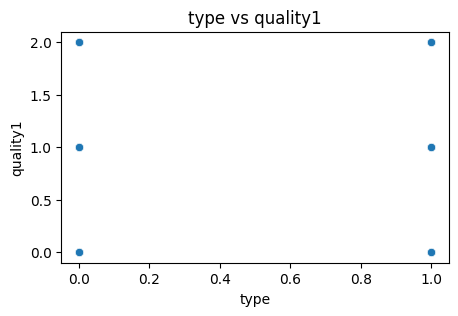

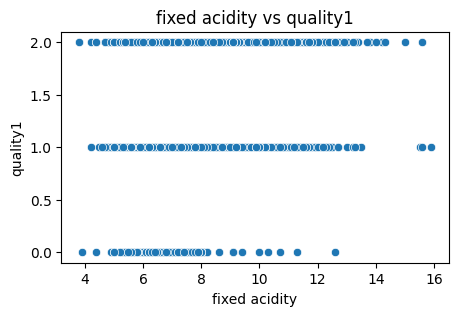

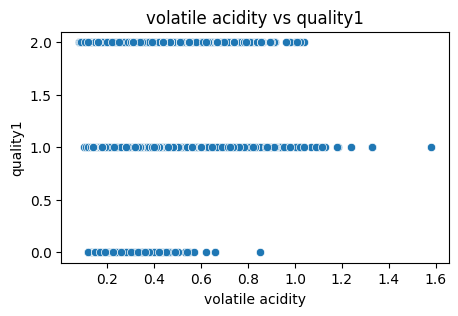

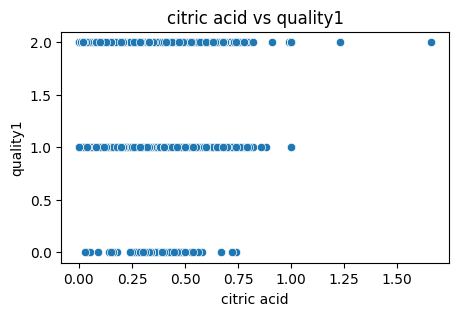

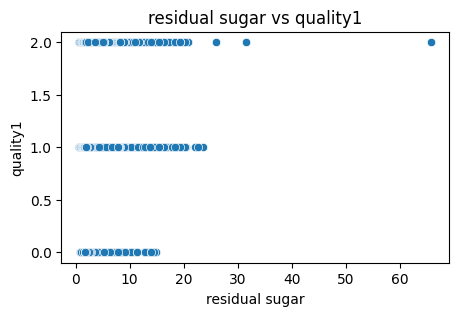

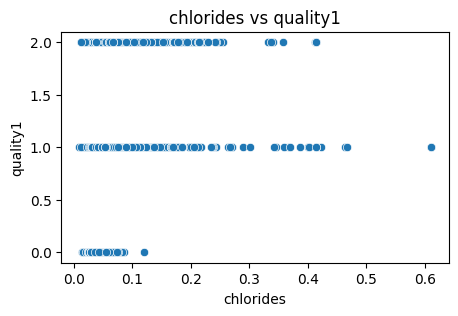

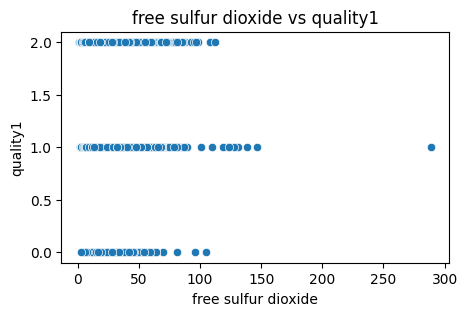

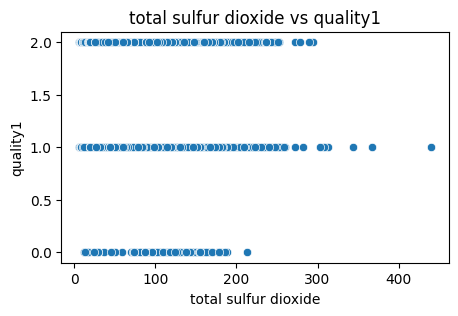

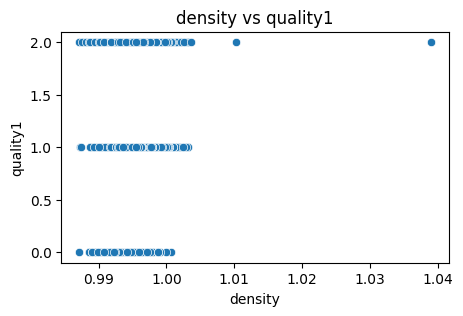

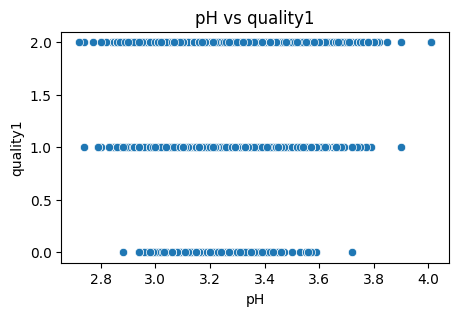

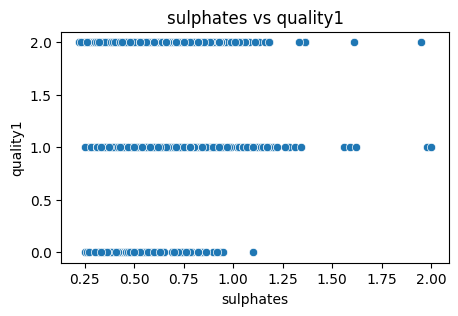

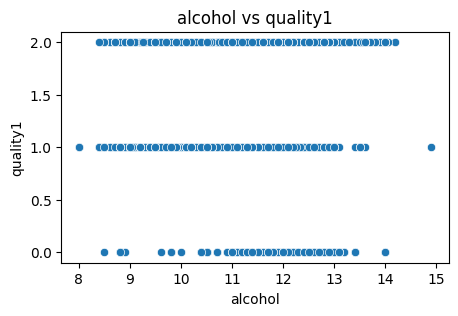

In [62]:
# Plot each feature against the target
import matplotlib.pyplot as plt
import seaborn as sns

features = ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = 'quality1' 

for col in features:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=visual_data[col], y=visual_data[target])
    plt.title(f"{col} vs {target}")
    plt.show()

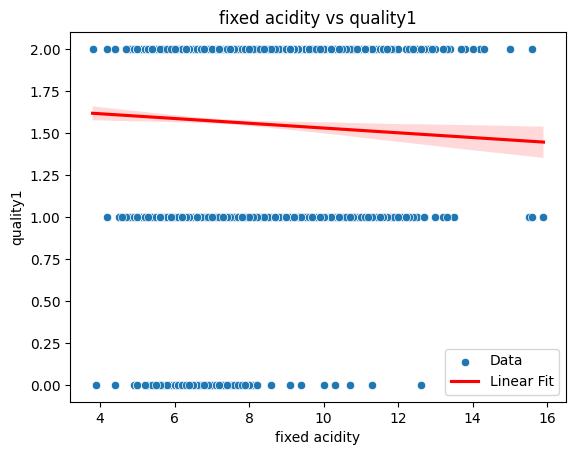

In [64]:
# scatter plot is the simplist and best ways to ckeck linear and non linear.
# set feature one by one
sns.scatterplot(x=visual_data['fixed acidity'], y=visual_data['quality1'], label='Data')
sns.regplot(x='fixed acidity', y='quality1', data=visual_data, scatter=False, color='red', label='Linear Fit')
plt.title('fixed acidity vs quality1')
plt.legend()
plt.show()

> #### **3: SCALING**

In [65]:
x = data.drop(columns='quality1')
y = data['quality1']

In [66]:
x.shape

(5329, 12)

In [67]:
y.shape

(5329,)

In [68]:
from sklearn.preprocessing import StandardScaler
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [69]:
# Ensure X remains a DataFrame
# x_scaled is need in dataframe because in correlation .corr is work with dataframe, and x_scaled is a numpay array.
x_final = pd.DataFrame(x_scaled, columns=data.drop(columns=['quality1']).columns)

In [71]:
x_final.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.585079,-0.164340,-0.440944,0.280576,3.474773,-0.316773,0.838662,0.982996,2.179883,-1.401557,-0.556392,-1.474288
1,0.585079,-0.695516,-0.262464,0.144578,-0.767085,-0.208178,-0.901550,0.313700,-0.180714,0.471982,-0.289108,-0.884080


> #### **4. Model Selection and Training**

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, stratify=y, random_state=42)

In [76]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
# Loop and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    print(f"{name}: Accuracy = {score:.3f}")


Logistic Regression: Accuracy = 0.698
Decision Tree: Accuracy = 0.660
Random Forest: Accuracy = 0.718


- **Logistic regression model**

In [77]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [79]:
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Logistic Regression Accuracy: {accuracy:.3f}")

Logistic Regression Accuracy: 69.842


In [82]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.65      0.60      0.62       498
           2       0.73      0.79      0.76       796

    accuracy                           0.70      1333
   macro avg       0.46      0.46      0.46      1333
weighted avg       0.68      0.70      0.69      1333

Confusion Matrix:
 [[  0   1  38]
 [  0 299 199]
 [  2 162 632]]


> #### **5. Model Optimization**

> ##### **5.1. Feature Selection**

In [86]:
# Step 1: Fit logistic regression with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(x_final, y)

# Step 2: Get non-zero features
selected_features = x_final.columns[model.coef_[0] != 0]
print("Selected Features:\n", selected_features)

# Step 3: Drop unimportant features
x_selected = x_final[selected_features]

Selected Features:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [88]:
x_selected.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.164340,-0.440944,0.280576,3.474773,-0.316773,0.838662,0.982996,2.179883,-1.401557,-0.556392,-1.474288
1,-0.695516,-0.262464,0.144578,-0.767085,-0.208178,-0.901550,0.313700,-0.180714,0.471982,-0.289108,-0.884080


> ##### **5.2. Handle Imbalance class**

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, stratify=y, random_state=42)

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
# apply SMOTE to training data only
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [102]:
x_train_resampled.shape

(7164, 11)

In [103]:
y_train_resampled.shape

(7164,)

In [104]:
x_test.shape

(1333, 11)

In [105]:
y_test.shape

(1333,)

- ##### **5.3: Tuning with Cross Validation**
- GridSearchCV is the better way to combine cross-validation + tuning and that is powerful workflow. not separately find cross validation score and then perform tuning.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(1, 31)),          # Try k = 1 to 30
    'weights': ['uniform', 'distance'],         # Weighting strategy
    'metric': ['euclidean', 'manhattan']        # Distance metric
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=kf,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train_resampled, y_train_resampled)
print("✅ Best Hyperparameters:", grid_search.best_params_)
print("✅ Best Cross-Validated Accuracy:", grid_search.best_score_)

best_knn_model = grid_search.best_estimator_



Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
✅ Best Cross-Validated Accuracy: 0.6575933600252625


In [107]:
lr1 = LogisticRegression(C = 1, penalty = 'l2')

In [108]:
lr1.fit(x_train_resampled, y_train_resampled)


LogisticRegression(C=1)

In [109]:
y_pred = lr1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Logistic Regression Accuracy: {accuracy:.3f}")

Logistic Regression Accuracy: 53.488


> #### **6. Ensemble Learning**

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score


rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=kf,
                           scoring='accuracy',   # Use 'f1_macro' for imbalanced classes
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train_resampled, y_train_resampled)
print("✅ Best Hyperparameters (Random Forest Classifier):", grid_search.best_params_)
print("✅ Best Cross-Validated Accuracy:", grid_search.best_score_)
best_rf_clf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Hyperparameters (Random Forest Classifier): {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
✅ Best Cross-Validated Accuracy: 0.8464542877972141


In [111]:
rmc = RandomForestClassifier(max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
rmc.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [112]:
y_pred = rmc.predict(x_test)

In [117]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f" Final Model Accuracy on Test Set: {accuracy:.3f}")

 Final Model Accuracy on Test Set: 66.542


In [115]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.23      0.17        39
           1       0.62      0.70      0.66       498
           2       0.75      0.66      0.70       796

    accuracy                           0.67      1333
   macro avg       0.50      0.53      0.51      1333
weighted avg       0.69      0.67      0.67      1333



In [116]:
# Confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


 Confusion Matrix:
[[  9   1  29]
 [  2 351 145]
 [ 58 211 527]]


- **now perform without hanlde imbalance class**

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, stratify=y, random_state=42)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score


rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=kf,
                           scoring='accuracy',   # Use 'f1_macro' for imbalanced classes
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_selected,y)
print("✅ Best Hyperparameters (Random Forest Classifier):", grid_search.best_params_)
print("✅ Best Cross-Validated Accuracy:", grid_search.best_score_)
best_rf_clf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Hyperparameters (Random Forest Classifier): {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
✅ Best Cross-Validated Accuracy: 0.7404768825586415


In [134]:
rmc1 = RandomForestClassifier(max_depth= 15,max_features='sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200)
rmc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [135]:
y_pred = rmc1.predict(x_test)

In [136]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f" Final Model Accuracy on Test Set: {accuracy:.3f}")

 Final Model Accuracy on Test Set: 71.643
